In [ ]:
from nltk.tokenize import word_tokenize
import unicodedata
import nltk
import pandas as pd
import re
import numpy as np
from bs4 import BeautifulSoup
import csv, pandas

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
read_file = pd.read_excel ('DATASET.xlsx')
read_file.to_csv ('DATASET.csv', index = None, header=True)

In [ ]:
read_file = pd.read_excel ('stopwordlist.xlsx')
read_file.to_csv ('stopwordlist.csv', index = None, header=True)

In [ ]:
maxwell = pandas.read_csv('/content/datadisneygabungan.csv', usecols=["Review"])
dt_tweet = maxwell["Review"].tolist()
maxwell.head()

,Review
0,I can’t describe the toilets they were probab...
1,"there are no water bidets in toilets, so tips ..."
2,drinking fountain and clean toilets everywhere
3,There’s water fountains for bottles next to al...
4,"The whole park and toilets are very clean, be..."


In [ ]:
len(maxwell)

319

In [ ]:
review = maxwell.values.tolist()

In [ ]:
review

[[' I can’t describe the toilets they were probably the most disgusting I’ve ever seen'],
 ['there are no water bidets in toilets, so tips here, bring a collapsible water bottle & refill it to use as makeshift water bidet. '],
 ['drinking fountain and clean toilets everywhere'],
 ['There’s water fountains for bottles next to almost all the toilets. Toilets are all air conditioned (even the portaloo ones) and are spotless.'],
 [' The whole park and toilets are very clean, beautiful gardens.'],
 ['There are drink fountains around the toilet areas so keep refilling your bottles. '],
 ['toilet breaks possible whenever you want. '],
 ['There was no issue with toilets as they are everywhere'],
 ['Toilets plentiful and clean.  '],
 ["Shocked to find that regular malls and even Ocean Park provide toilet cleaner liquid dispenser in every cubicle and Disneyland has none! Maybe it's time to upgrade it as well."],
 ['toilets were clean too . '],
 ['Toilets however can be cleaner and should have qu

In [ ]:
def remove_html(str):
    soup = BeautifulSoup(str, 'lxml')
    return soup.get_text()

def casefolding(s):
    new_str = s.lower()
    return new_str

def remove_punctuation(text):
    """ Remove all punctuation in text. """
    return re.sub(r'[^\s\w]', ' ', text)

def remove_repeated_character(str):
    str = re.sub(r'(.)\1{2,}', r'\1', str)

    return str

def remove_digit_number(text):
    return re.sub(r'[^a-z ]*([.0-9])*\d', '', text)

def remove_unused_character(text):
    """ Remove characters that are less than two character. """
    text_list = text.split(' ')
    text_list_temp = []

    for index in range(len(text_list)):
      if text_list != 'no':
        if len(text_list[index]) > 3:
            text_list_temp.append(text_list[index])

    return ' '.join(text_list_temp)

def remove_extra_space(text):
        """ Make extra space into one space. """
        text_list = text.split(' ')
        text_list_temp = []

        for word in text_list:
            if word.strip():
                text_list_temp.append(word.strip())

        return ' '.join(text_list_temp)

def remove_stopword(str):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]

    return ' '.join(filtered_sentence)

#def remove_stopword(text):
#    stop_words = set(stopwords.words('english'))
#    word_tokens = word_tokenize(text)
#    filtered_sentence = [w for w in word_tokens if not w in stop_words]
#    return ' '.join(filtered_sentence)

def remove_non_ascii(str):
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return str

import re

In [ ]:
flat_list = [item for sublist in review for item in sublist]

In [ ]:
len(flat_list)

319

In [ ]:
flat_list

[' I can’t describe the toilets they were probably the most disgusting I’ve ever seen',
 'there are no water bidets in toilets, so tips here, bring a collapsible water bottle & refill it to use as makeshift water bidet. ',
 'drinking fountain and clean toilets everywhere',
 'There’s water fountains for bottles next to almost all the toilets. Toilets are all air conditioned (even the portaloo ones) and are spotless.',
 ' The whole park and toilets are very clean, beautiful gardens.',
 'There are drink fountains around the toilet areas so keep refilling your bottles. ',
 'toilet breaks possible whenever you want. ',
 'There was no issue with toilets as they are everywhere',
 'Toilets plentiful and clean.  ',
 "Shocked to find that regular malls and even Ocean Park provide toilet cleaner liquid dispenser in every cubicle and Disneyland has none! Maybe it's time to upgrade it as well.",
 'toilets were clean too . ',
 'Toilets however can be cleaner and should have queue for elderly for the

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#resl = []
#for m in flat_list:
#    t = m.split()
#    hasil = ct.tag_sents([t])
#    tmp = Neg_Handling(hasil)
#    resl.append(tmp)
#     x = casefolding(maxwell1['Review_Bersih'][i])
#     x = remove_repeated_character(x)
#     x = remove_punctuation(x)
#     x = remove_digit_number(x)
#     x = remove_unused_character(x)
#     x = remove_extra_space(x)
#     x = normalize_slang_word(normalize_slang_word(x))
#     x = join_negation(x)
#     x = remove_extra_space(x)
#     stp.append(x)
#     i += 1
i = 0
sent = []
while i < len(dt_tweet):
    x = str(dt_tweet[i])
    x = remove_html(x)
    x = casefolding(x)
    x = x.replace(".", " ")
    x = x.replace(",", " ")
    x = x.replace("'", "")
    x = x.replace("’", "")
    x = remove_digit_number(x)
    x = remove_punctuation(x)
    #x = remove_unused_character(x)
    x = remove_non_ascii(x)
    x = remove_stopword(x)
    x = remove_extra_space(x)
    sent.append(x)
    i += 1

In [ ]:
remove_stopword('we waited here for couple of hours before our train left to trang the waiting area is decent  and there is across the road so you can buy snacks and drinks beware of the bathrooms though they are very dirty and are all squatter toilets')

'waited couple hours train left trang waiting area decent across road buy snacks drinks beware bathrooms though dirty squatter toilets'

In [ ]:
sent

['i cant describe the toilets they were probably the most disgusting ive ever seen',
 'there are no water bidets in toilets so tips here bring a collapsible water bottle refill it to use as makeshift water bidet',
 'drinking fountain and clean toilets everywhere',
 'theres water fountains for bottles next to almost all the toilets toilets are all air conditioned even the portaloo ones and are spotless',
 'the whole park and toilets are very clean beautiful gardens',
 'there are drink fountains around the toilet areas so keep refilling your bottles',
 'toilet breaks possible whenever you want',
 'there was no issue with toilets as they are everywhere',
 'toilets plentiful and clean',
 'shocked to find that regular malls and even ocean park provide toilet cleaner liquid dispenser in every cubicle and disneyland has none maybe its time to upgrade it as well',
 'toilets were clean too',
 'toilets however can be cleaner and should have queue for elderly for the rides',
 'cleaner and more ac

In [ ]:
len(sent)

319

In [ ]:
nestlist = []
for x in sent:
    val = [x]
    nestlist.append(val)

In [ ]:
import csv
header = ['review']
with open('disneybersih2.csv', 'w',  encoding="utf-8", newline='') as fp:
    a = csv.writer(fp,delimiter=',')
    a.writerow(header)
    for val in nestlist:
        a.writerow(val)

In [ ]:
read_file = pd.read_csv ('disneybersih2.csv')
read_file.to_excel ('disneybersih2.xlsx', index = None, header=True)

stop disini

In [ ]:
#Importing Libraries

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

from wordcloud import WordCloud

#Importing Dataset

df = pd.read_csv("1.csv")

#Checking the Data

df.head()

#Creating the text variable

text2 = " ".join(title for title in df.title)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

from wordcloud import WordCloud

In [ ]:
read_file = pd.read_excel ('datadisneygabungan.xlsx')
read_file.to_csv ('datadisneygabungan.csv', index = None, header=True)

In [ ]:
df = pd.read_csv("datadisneygabungan.csv")

In [ ]:
df.head()

,Review
0,I can’t describe the toilets they were probab...
1,"there are no water bidets in toilets, so tips ..."
2,drinking fountain and clean toilets everywhere
3,There’s water fountains for bottles next to al...
4,"The whole park and toilets are very clean, be..."


In [ ]:
text2 = " ".join(review for review in df.Review)

In [ ]:
text2

' I can’t describe the toilets they were probably the most disgusting I’ve ever seen there are no water bidets in toilets, so tips here, bring a collapsible water bottle & refill it to use as makeshift water bidet.  drinking fountain and clean toilets everywhere There’s water fountains for bottles next to almost all the toilets. Toilets are all air conditioned (even the portaloo ones) and are spotless.  The whole park and toilets are very clean, beautiful gardens. There are drink fountains around the toilet areas so keep refilling your bottles.  toilet breaks possible whenever you want.  There was no issue with toilets as they are everywhere Toilets plentiful and clean.   Shocked to find that regular malls and even Ocean Park provide toilet cleaner liquid dispenser in every cubicle and Disneyland has none! Maybe it\'s time to upgrade it as well. toilets were clean too .  Toilets however can be cleaner and should have queue for elderly for the rides. cleaner and more accessible public t

In [ ]:
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

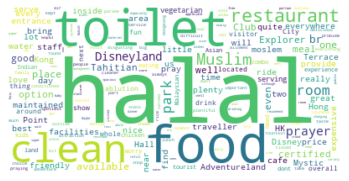

In [ ]:
plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()